In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
life = pd.read_csv(r'data11.csv')

In [11]:
life.head()

,country,year,status,adult_mortality,alcohol,percentage_exp,hepatitis_B,measles,bmi,polio,total_expenditure,diphtheria,hiv_or_aids,gdp,population,income_composition_of_resources,schooling,life_expectancy
0,United States of America,2019,Developed,17.0,8.10,1872.96,91.0,310.0,68.3,90.0,17.50,90.0,0.1,65298.0,329064917.0,0.925,16.2,78.87
1,United States of America,2018,Developed,15.0,8.20,1872.96,89.5,264.0,70.1,91.0,16.90,96.0,0.1,62996.0,327096265.0,0.905,16.6,78.81
2,United States of America,2017,Developed,13.0,8.47,1872.96,90.0,215.0,69.1,92.0,17.03,91.0,0.1,60062.0,327096266.0,0.920,16.5,78.84
3,United States of America,2016,Developed,12.0,8.60,1872.96,91.0,210.0,69.4,94.0,17.16,96.0,0.1,57952.0,327096267.0,0.901,16.0,78.86
4,United States of America,2015,Developed,13.0,8.50,0.00,92.0,188.0,69.6,93.0,17.02,95.0,0.1,56839.0,327096268.0,0.896,16.3,78.89


In [12]:
life.size

10080

In [13]:
life.shape

(560, 18)

In [14]:
life.columns

Index(['country', 'year', 'status', 'adult_mortality', 'alcohol',
       'percentage_exp', 'hepatitis_B', 'measles', 'bmi', 'polio',
       'total_expenditure', 'diphtheria', 'hiv_or_aids', 'gdp', 'population',
       'income_composition_of_resources', 'schooling', 'life_expectancy'],
      dtype='object')

In [15]:
life.describe()

,year,adult_mortality,alcohol,percentage_exp,hepatitis_B,measles,bmi,polio,total_expenditure,diphtheria,hiv_or_aids,gdp,population,income_composition_of_resources,schooling,life_expectancy
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02,560.000000,560.000000,560.000000
mean,2009.500000,129.585357,7.124848,1872.964517,77.415464,4528.208643,52.192089,90.019643,7.534964,89.876786,0.681750,20557.658349,1.198210e+08,0.775882,17.730393,74.947259
std,5.771437,81.606506,3.744838,2787.867381,26.067206,28277.457113,16.095803,12.341683,2.927250,13.351783,3.494236,37303.843013,2.249865e+08,0.098594,64.917982,5.836794
min,2000.000000,2.000000,0.010000,0.000000,0.000000,0.000000,5.100000,9.000000,1.220000,7.000000,0.100000,1.681350,1.646180e+05,0.489000,8.300000,53.900000
25%,2004.750000,75.000000,4.527500,74.643529,72.000000,6.000000,52.000000,88.000000,5.560000,88.750000,0.100000,3765.279840,3.381950e+07,0.695000,12.900000,71.157500
50%,2009.500000,118.500000,7.670000,623.207443,88.000000,83.000000,57.600000,95.000000,7.195000,95.000000,0.100000,9637.397732,5.782741e+07,0.780000,15.050000,75.620000
75%,2014.250000,159.000000,9.975000,2062.163053,96.000000,785.750000,61.800000,97.000000,9.230000,97.000000,0.100000,35378.724367,1.172273e+08,0.867250,16.300000,79.600000
max,2019.000000,498.000000,13.890000,11947.124030,99.000000,621344.000000,70.100000,99.000000,17.600000,99.000000,29.700000,592641.300000,1.366418e+09,0.932000,1539.000000,83.570000


In [16]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          560 non-null    object 
 1   year                             560 non-null    int64  
 2   status                           560 non-null    object 
 3   adult_mortality                  560 non-null    float64
 4   alcohol                          560 non-null    float64
 5   percentage_exp                   560 non-null    float64
 6   hepatitis_B                      560 non-null    float64
 7   measles                          560 non-null    float64
 8   bmi                              560 non-null    float64
 9   polio                            560 non-null    float64
 10  total_expenditure                560 non-null    float64
 11  diphtheria                       560 non-null    float64
 12  hiv_or_aids           

In [17]:
life.isnull().sum()

country                            0
year                               0
status                             0
adult_mortality                    0
alcohol                            0
percentage_exp                     0
hepatitis_B                        0
measles                            0
bmi                                0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv_or_aids                        0
gdp                                0
population                         0
income_composition_of_resources    0
schooling                          0
life_expectancy                    0
dtype: int64

In [35]:
col_dict = {'life_expectancy':1 , 'adult_mortality':2 ,
        'alcohol':3 , 'percentage_exp': 4, 'hepatitis_B': 5,
            'bmi': 6, 'total_expenditure' :8,
       'diphtheria':9,'population' :11}

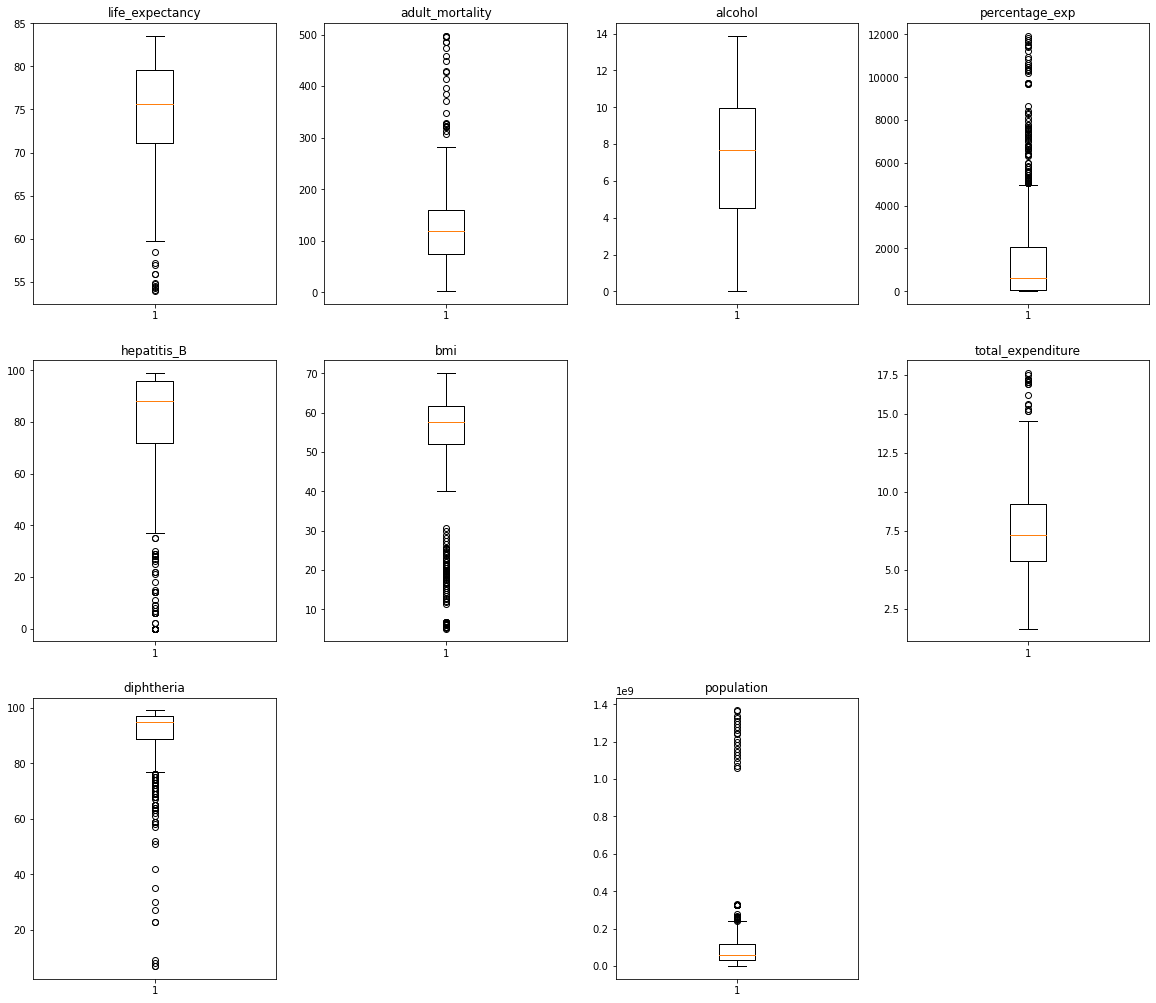

In [36]:
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(life[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [20]:
all_col = ['adult_mortality','income_composition_of_resources','population','life_expectancy'] 

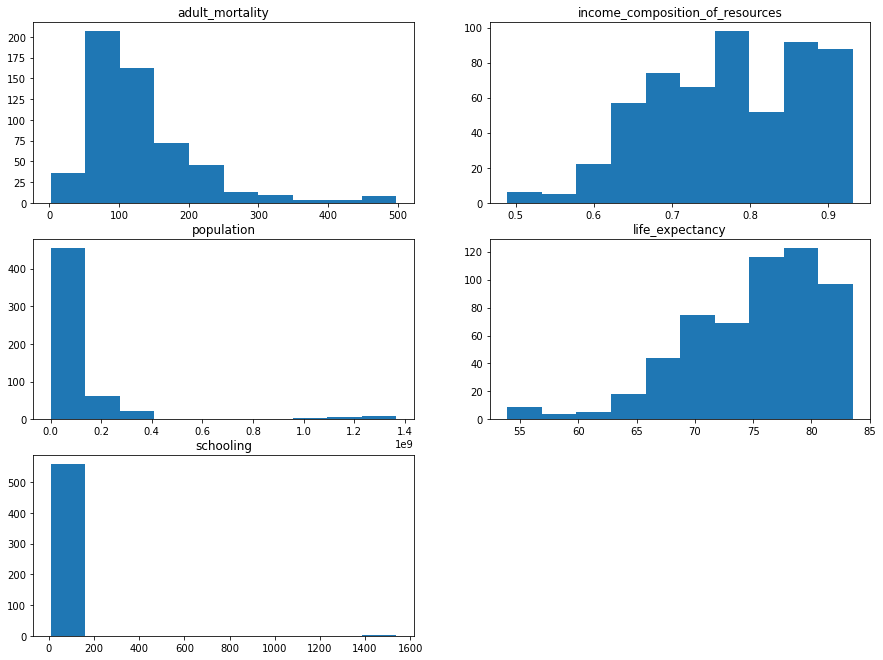

In [21]:
# Analysis of different features which are relevant to life expectancy rate

plt.figure(figsize=(15,75))

for i in range(len(all_col)):
    plt.subplot(19,2,i+1)
    plt.hist(life[all_col[i]])
    plt.title(all_col[i])

plt.show()

In [22]:
life.describe(include= 'O')

,country,status
count,560,560
unique,30,2
top,Italy,Developing
freq,20,340


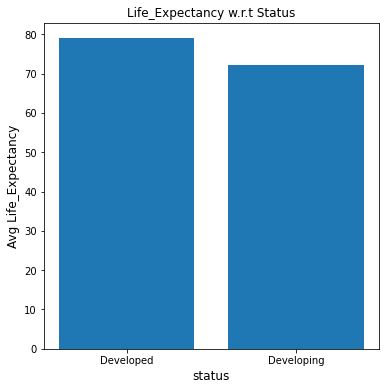

In [23]:
# compaing status of countries with respect to life expectancy 

plt.figure(figsize=(6,6))
plt.bar(life.groupby('status')['status'].count().index,life.groupby('status')['life_expectancy'].mean())
plt.xlabel("status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Status")
plt.show()


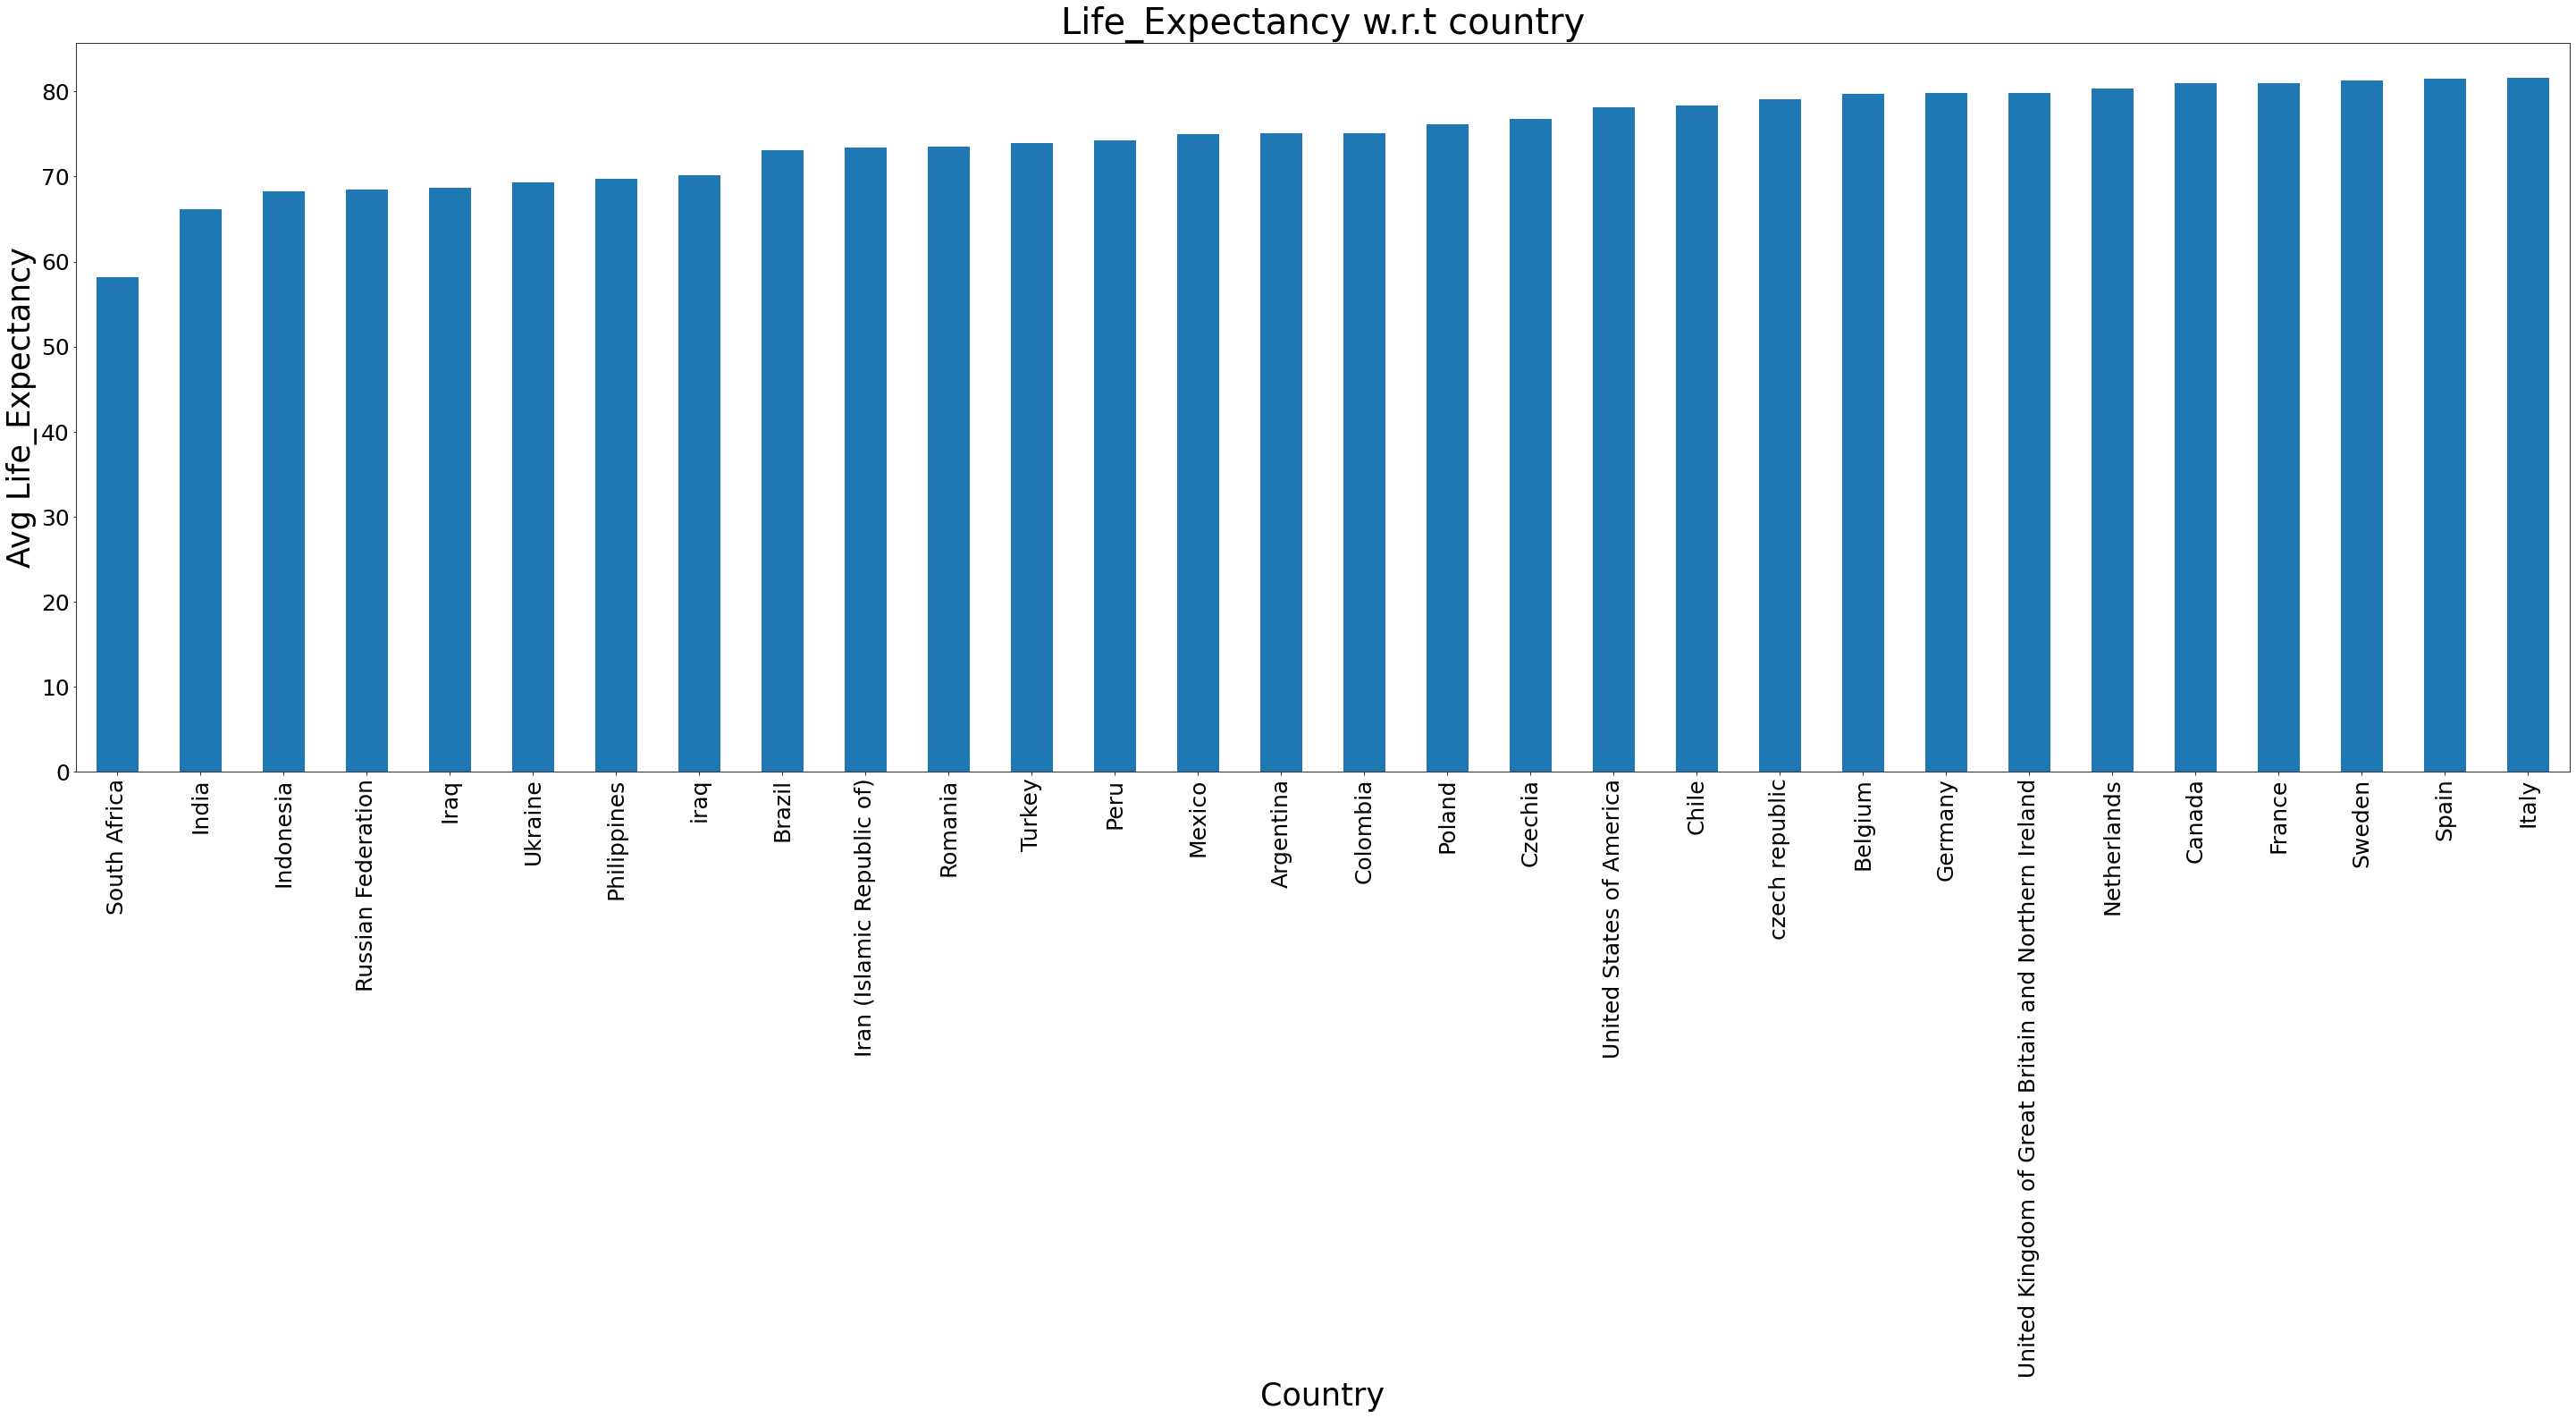

In [24]:
## Life expectancy with respect to country

df_country = life.groupby('country')['life_expectancy'].mean().sort_values(ascending=True)
df_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Life_Expectancy w.r.t country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Life_Expectancy",fontsize=35)
plt.show()

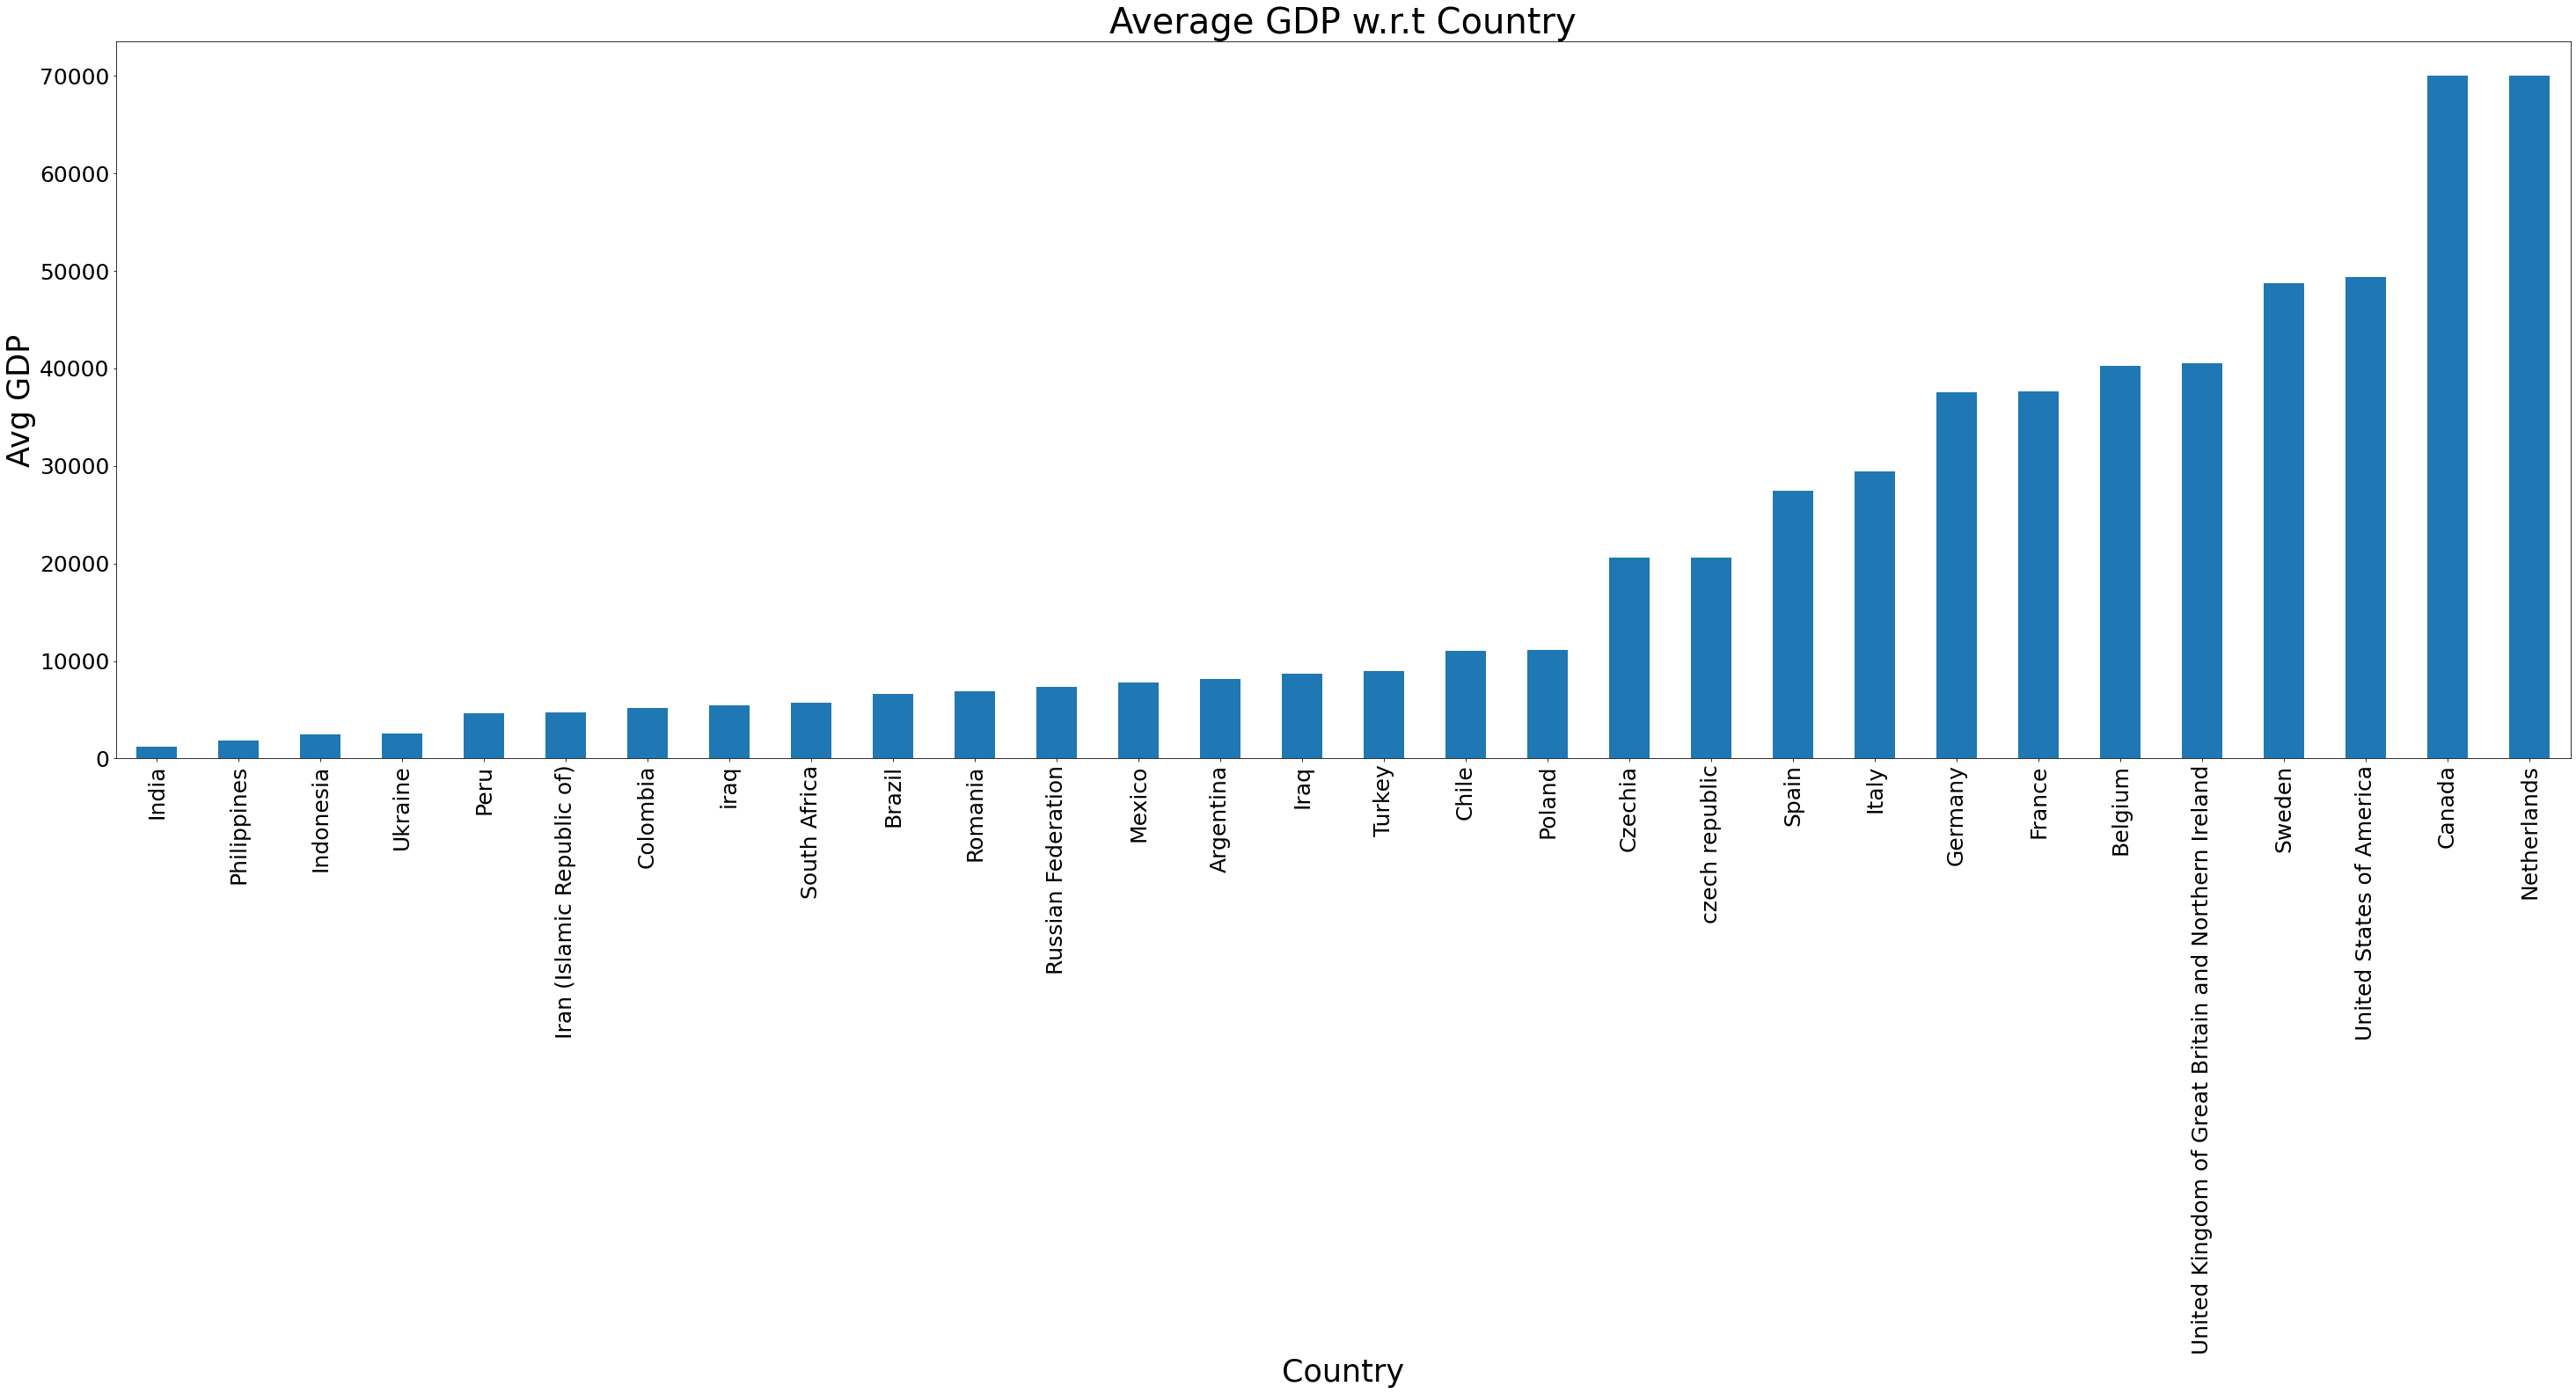

In [25]:
## country wise GDP 

df2_country = life.groupby('country')['gdp'].mean().sort_values(ascending=True)
df2_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Average GDP w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg GDP",fontsize=35)
plt.show()

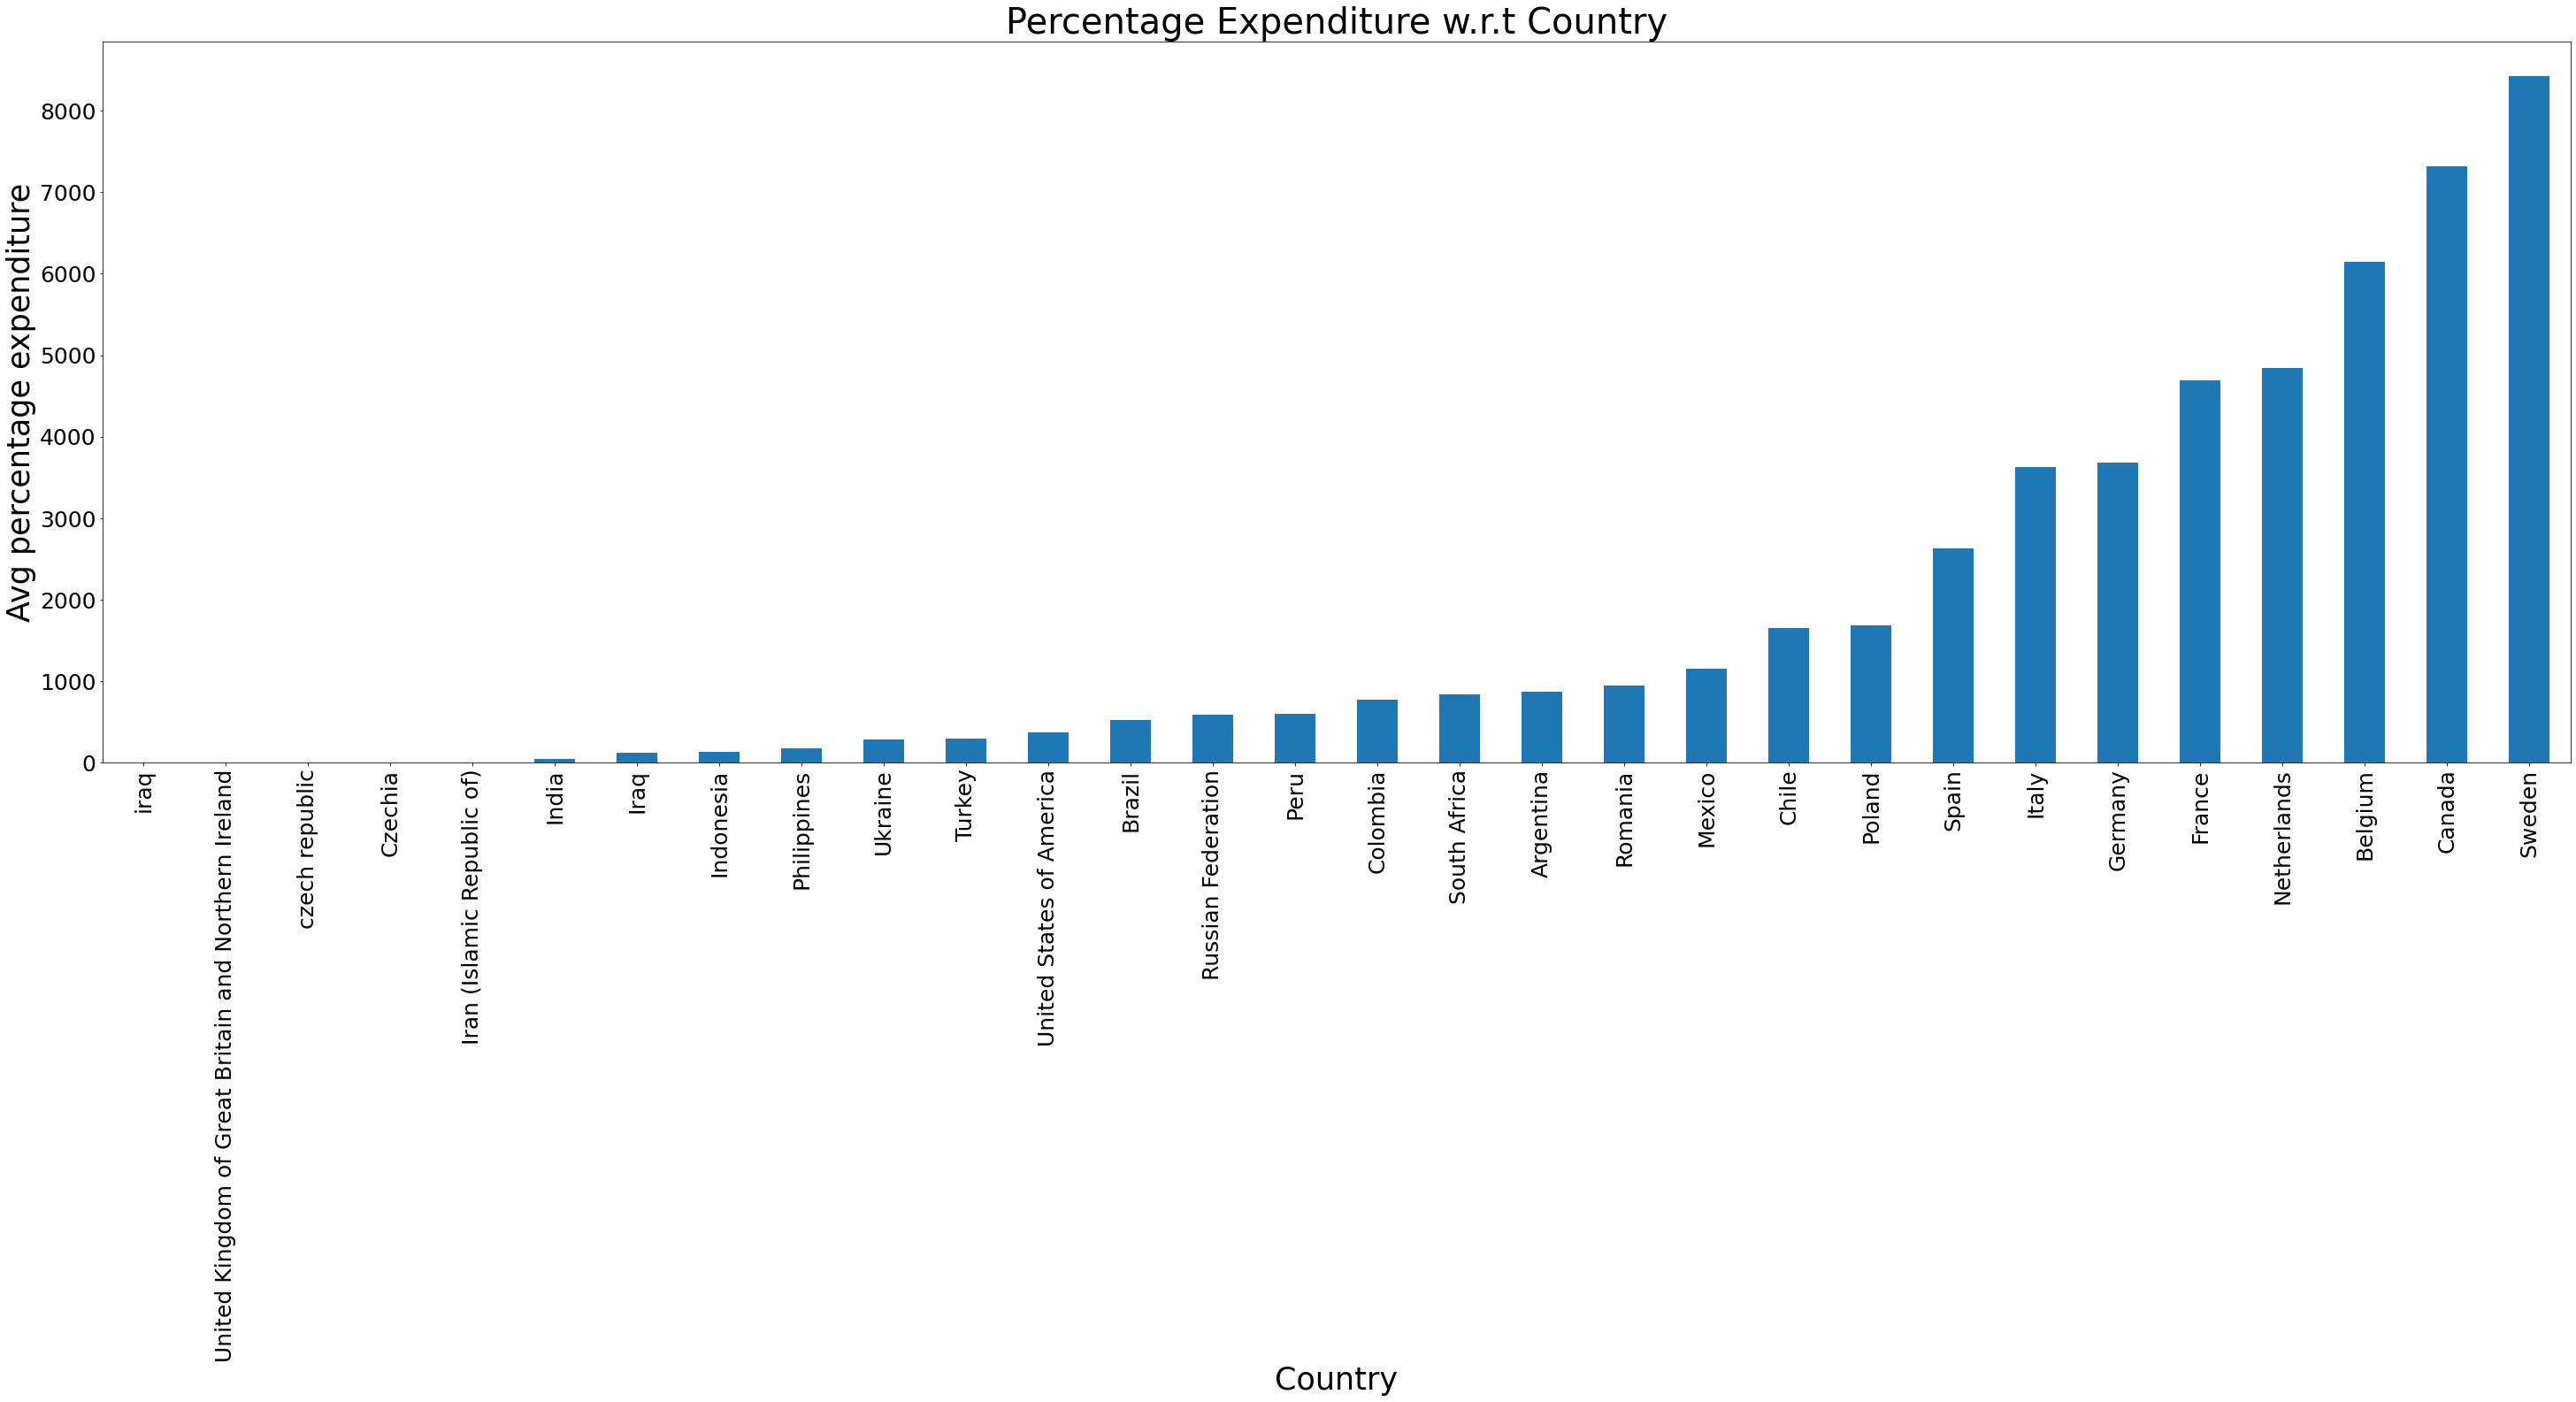

In [88]:
## country wise Percentage Expenditure

df3_country = life.groupby('country')['percentage_exp'].mean().sort_values(ascending=True)
df3_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Percentage Expenditure w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg percentage expenditure",fontsize=35)
plt.show()

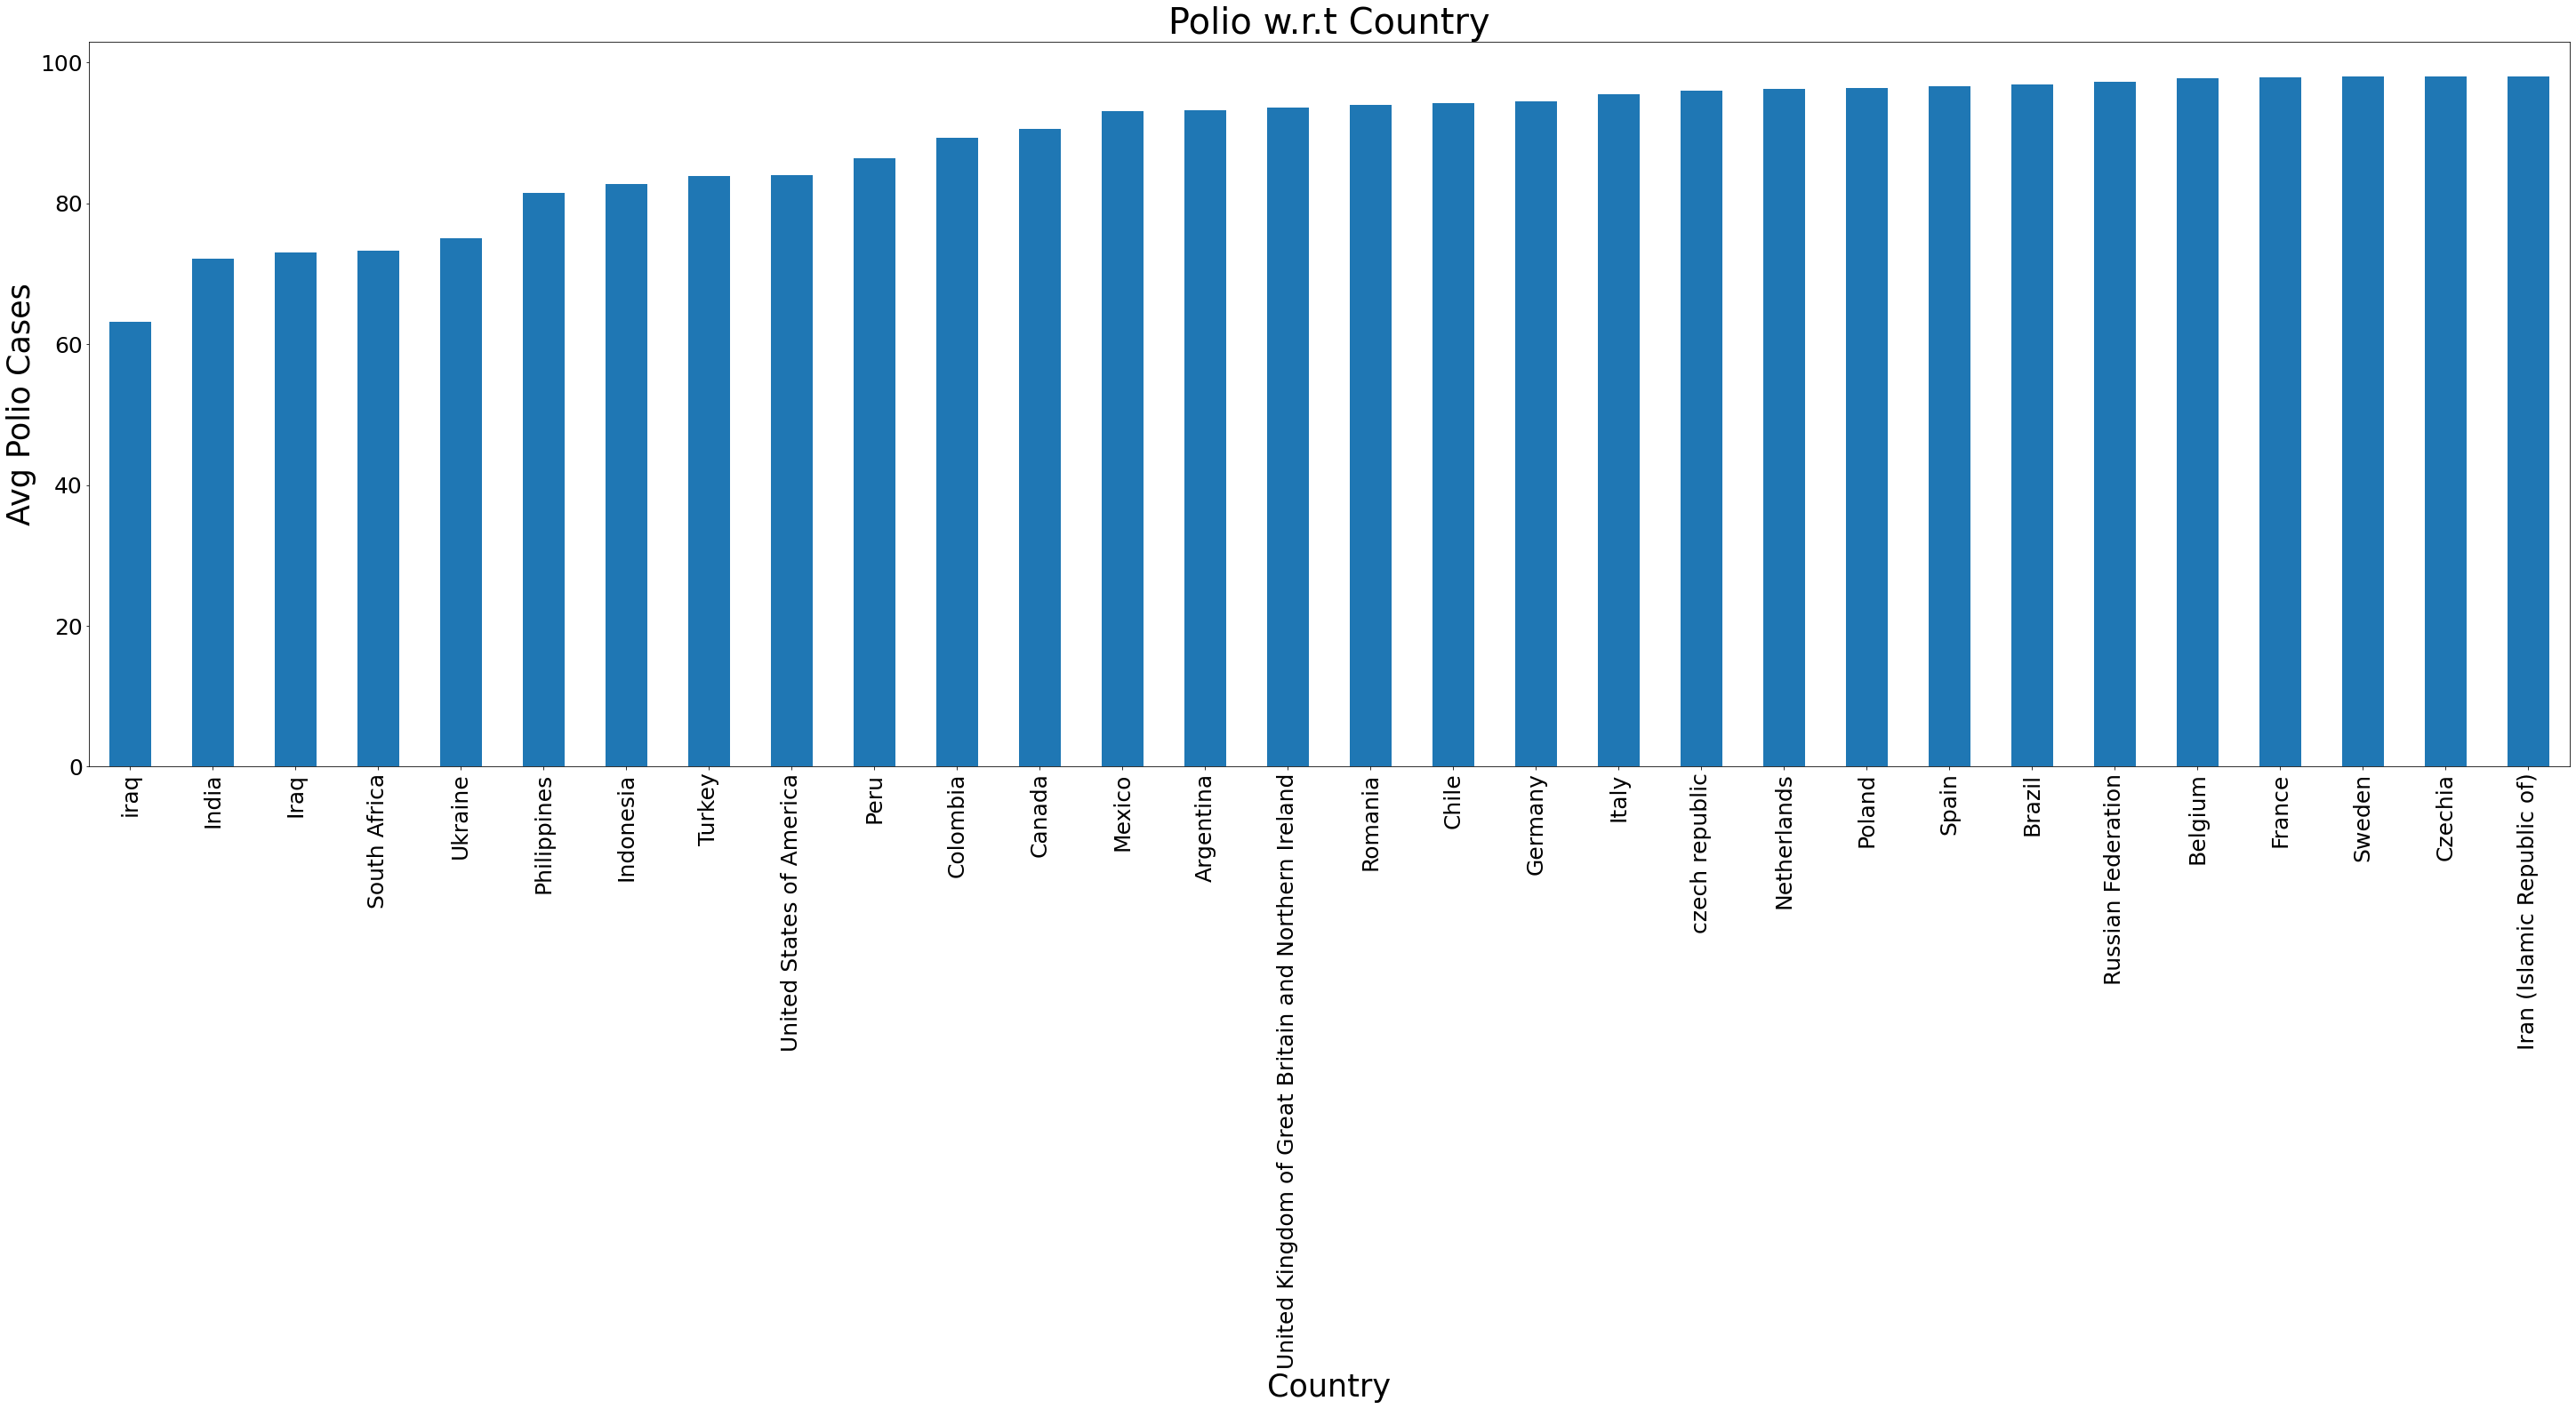

In [26]:
# country wise Polio deaths

df4_country = life.groupby('country')['polio'].mean().sort_values(ascending=True)
df4_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Polio w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Polio Cases",fontsize=35)
plt.show()

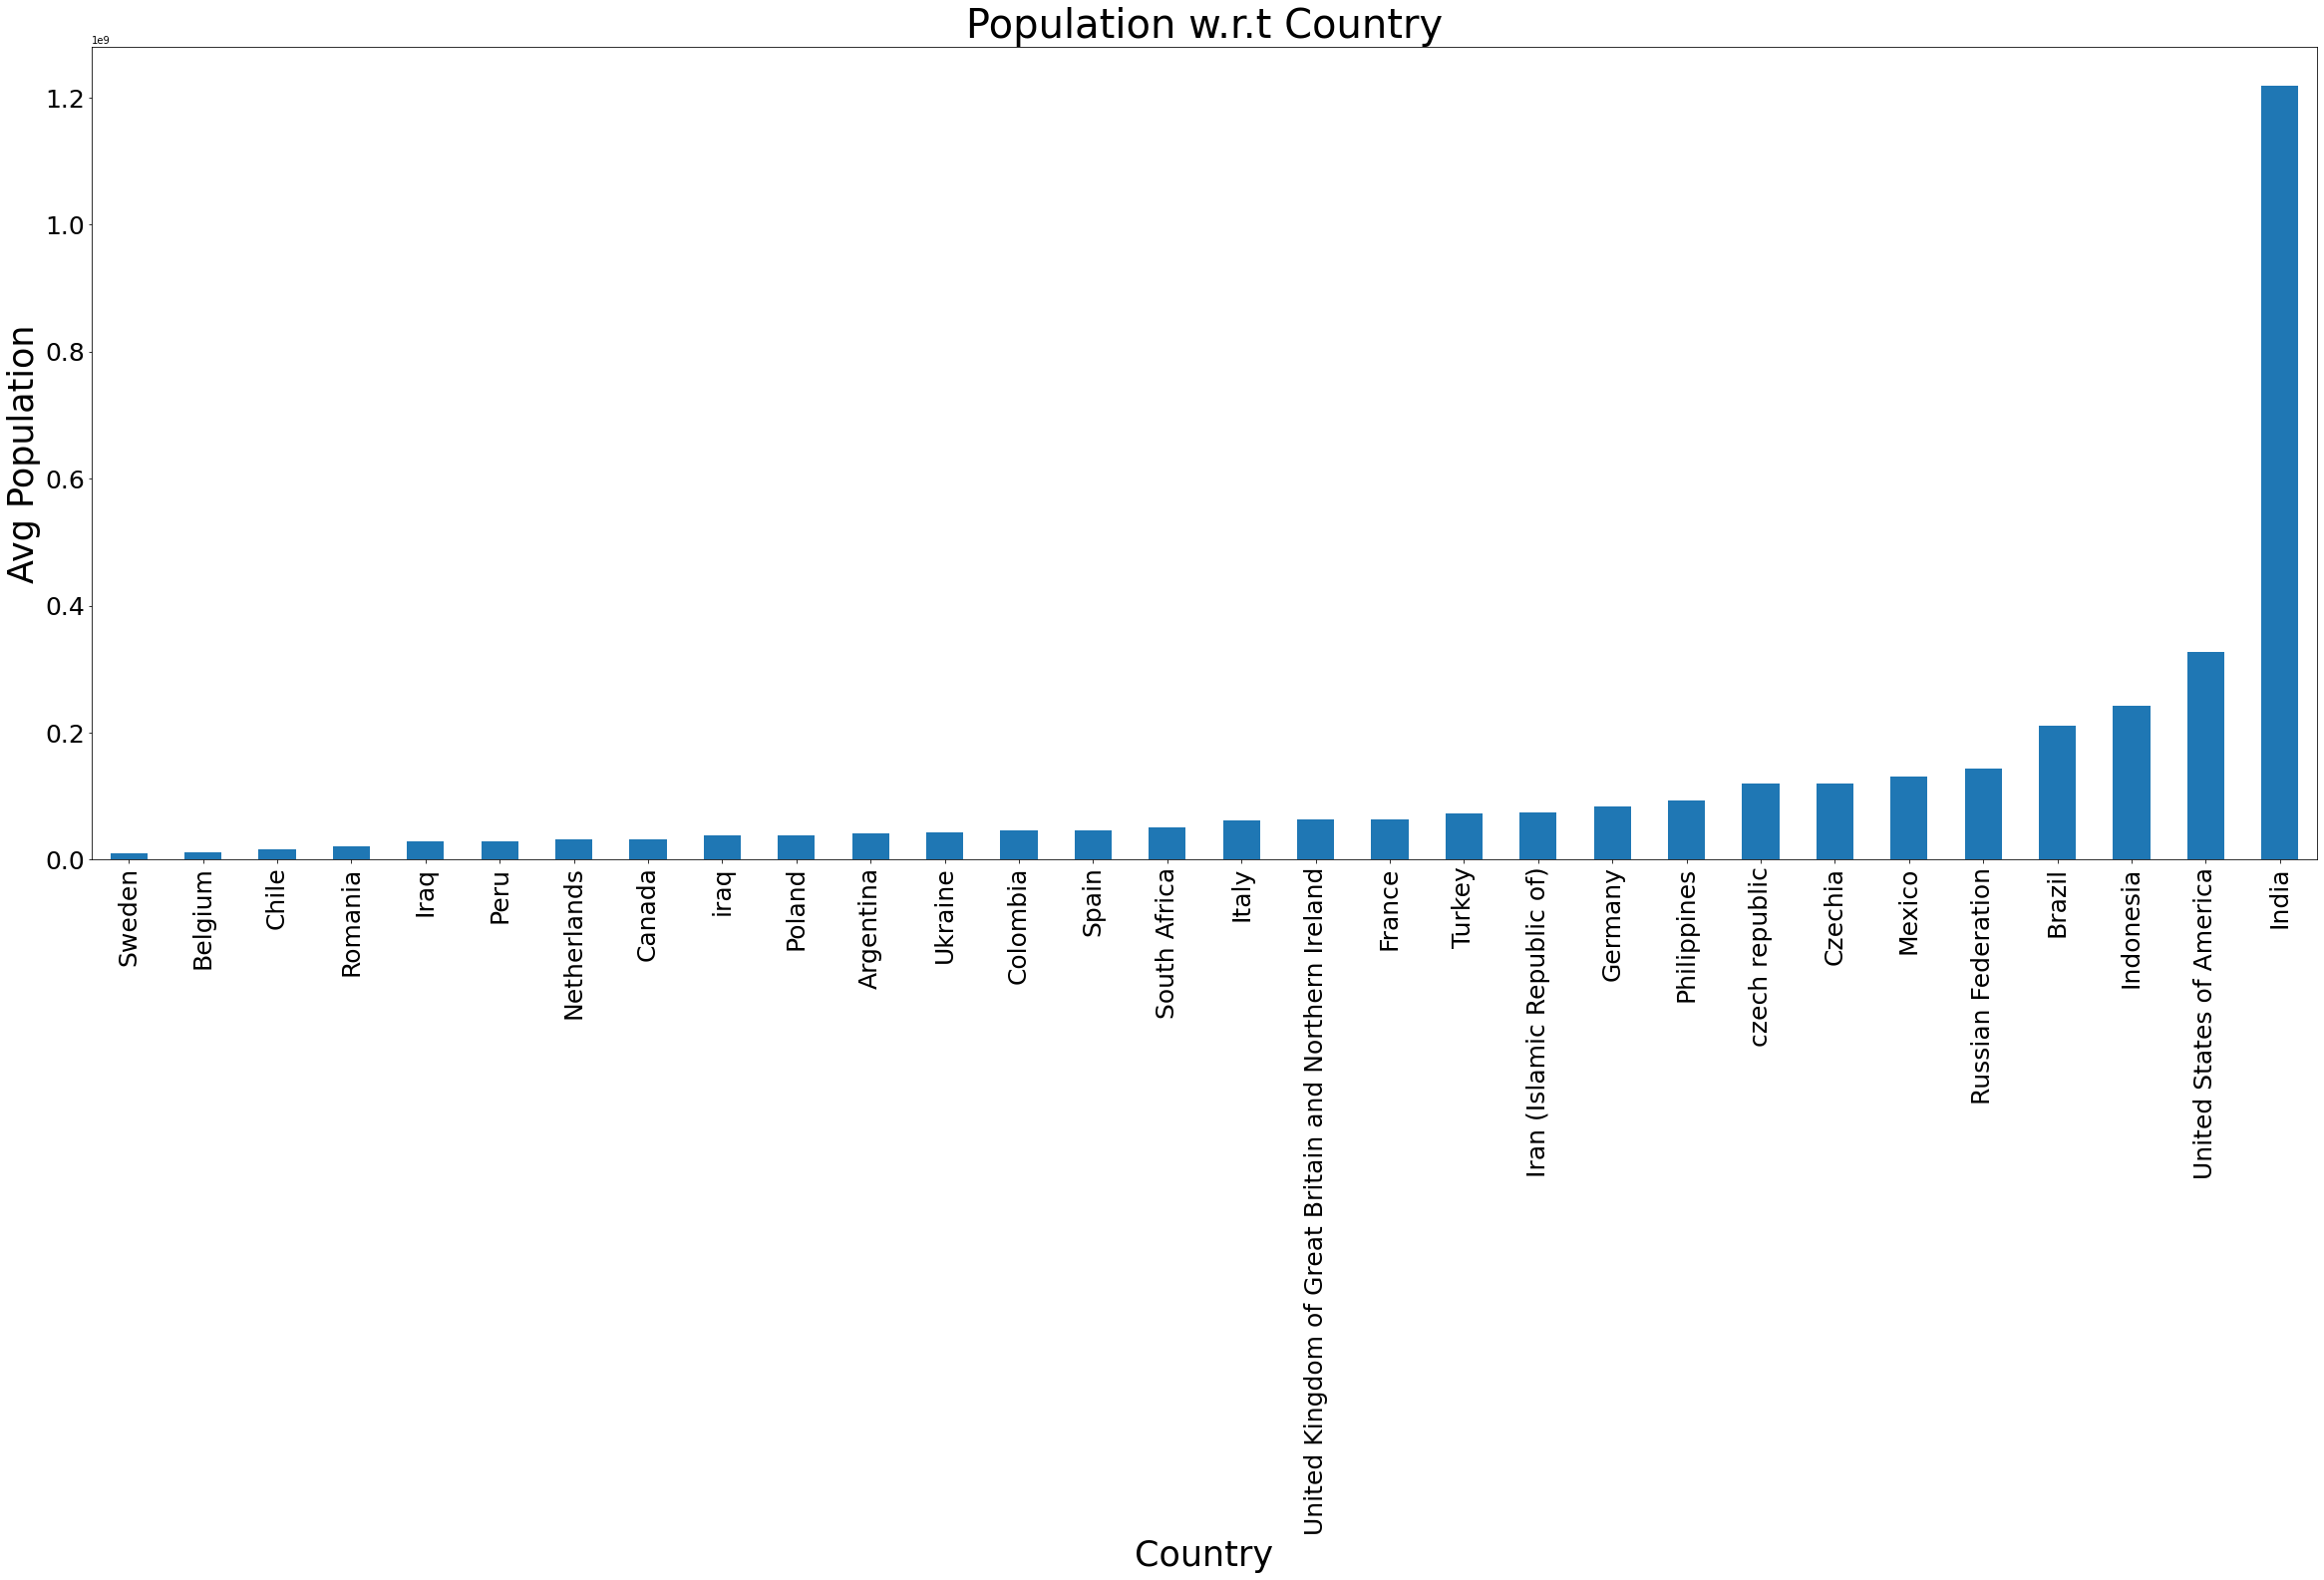

In [32]:
## country wise polulation

df5_country = life.groupby('country')['population'].mean().sort_values(ascending=True)
df5_country.plot(kind='bar', figsize=(40,15), fontsize=25)
plt.title("Population w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Population",fontsize=35)
plt.show()

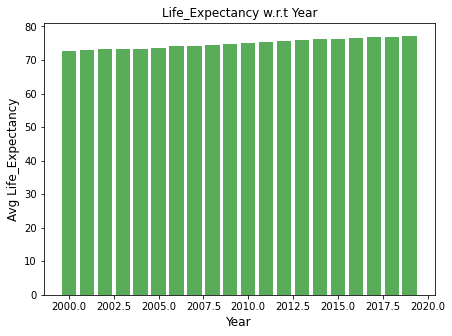

In [59]:
## Bar plot for Life Expectamcy v/s Year

plt.figure(figsize=(7,5))
plt.bar(life.groupby('year')['year'].count().index,life.groupby('year')['life_expectancy'].mean(),color='green',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Year")
plt.show()

Text(0, 0.5, 'Total Expenditure')

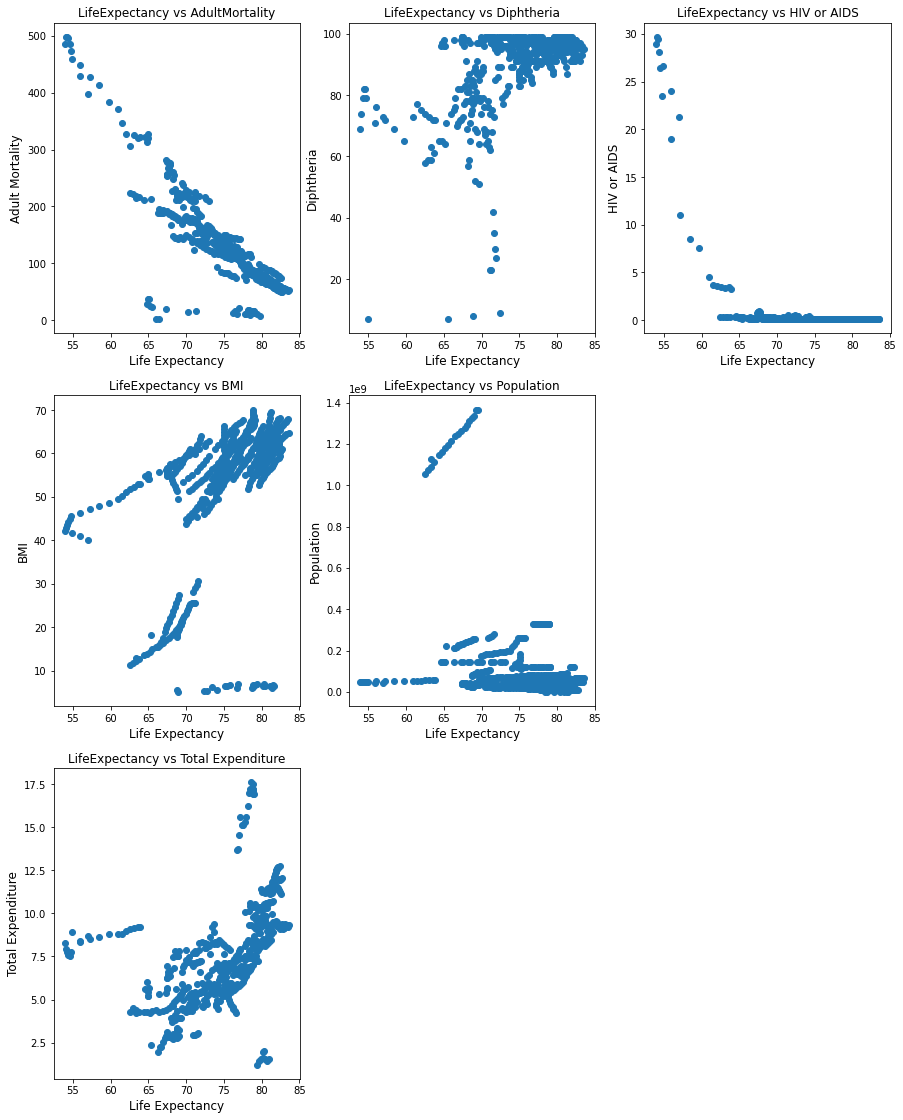

In [33]:
## Scatter Plots to see the corelation between 2 features

plt.figure(figsize=(15,40))

plt.subplot(6,3,1)
plt.scatter(life["life_expectancy"], life["adult_mortality"])
plt.title("LifeExpectancy vs AdultMortality")
plt.xlabel("Life Expectancy",fontsize=12)
plt.ylabel("Adult Mortality",fontsize=12)

plt.subplot(6,3,2)
plt.scatter(life["life_expectancy"], life["diphtheria"])
plt.title("LifeExpectancy vs Diphtheria")
plt.xlabel("Life Expectancy",fontsize=12)
plt.ylabel("Diphtheria",fontsize=12)

plt.subplot(6,3,3)
plt.scatter(life["life_expectancy"], life["hiv_or_aids"])
plt.title("LifeExpectancy vs HIV or AIDS")
plt.xlabel("Life Expectancy",fontsize=12)
plt.ylabel("HIV or AIDS",fontsize=12)

plt.subplot(6,3,4)
plt.scatter(life["life_expectancy"], life["bmi"])
plt.title("LifeExpectancy vs BMI")
plt.xlabel("Life Expectancy",fontsize=12)
plt.ylabel("BMI",fontsize=12)

plt.subplot(6,3,5)
plt.scatter(life["life_expectancy"], life["population"])
plt.title("LifeExpectancy vs Population")
plt.xlabel("Life Expectancy",fontsize=12)
plt.ylabel("Population",fontsize=12)

plt.subplot(6,3,7)
plt.scatter(life["life_expectancy"], life["total_expenditure"])
plt.title("LifeExpectancy vs Total Expenditure")
plt.xlabel("Life Expectancy",fontsize=12)
plt.ylabel("Total Expenditure",fontsize=12)